
By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/03/15

Videos:
* [[10分鐘搞懂機器學習] 4.2 超簡單 我用ChatGPT快速完成分類器 Python程式碼](https://youtu.be/JbEpMIblSsA?si=-dUgjihKP7-Sf72f)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


In [ ]:
# Prompt:使用Scikit-Learn載入MNIST資料
from sklearn.datasets import fetch_openml

# 載入 MNIST 資料集
# MNIST 數據集(Modified National Institute of Standards and Technology database)
# 龐大的資料庫，學習機器學習的人一定會用到
mnist = fetch_openml('mnist_784')



# 取得圖片資料和標籤
X, y = mnist.data, mnist.target

# 輸出資料集的維度
print("MNIST 資料集的維度：")
print("圖片資料維度：", X.shape)
print("標籤資料維度：", y.shape)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


MNIST 資料集的維度：
圖片資料維度： (70000, 784)
標籤資料維度： (70000,)


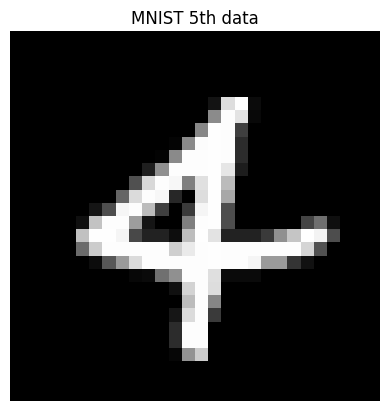

In [ ]:
#Prompt: 選擇X的第5筆資料，圖示化呈現
import matplotlib.pyplot as plt
import numpy as np

# Python的資料會以不同形態儲存，機器學習的應用中，為了方便計算，通常將資料形態轉換成numpy.ndarray
X=X.values
y=np.array(y,dtype=int)

# 取得第五筆資料
image = X[150].reshape(28, 28)  # MNIST 圖片大小為 28x28

# 圖片視覺化
plt.imshow(image, cmap='gray')
plt.axis('off')  # 不顯示坐標軸
plt.title('MNIST 5th data')
plt.show()


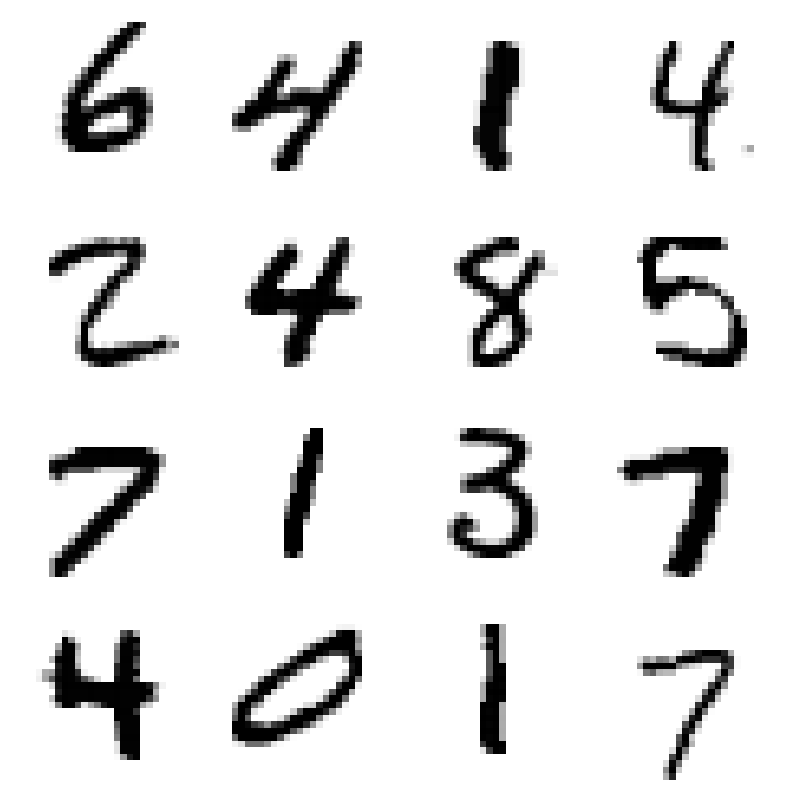

In [ ]:
# Prompt 從X中隨機選擇16筆資料，圖示化呈現
import numpy as np

# 随机选择16个样本的索引
random_indexes = np.random.randint(0, len(X), size=16)

# 创建一个4x4的子图布局
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

# 在子图中显示每个样本的图像
for i, ax in enumerate(axes.flat):
    sample_index = random_indexes[i]
    sample_image = X[sample_index].reshape(28, 28)
    sample_label = y[sample_index]
    ax.imshow(sample_image, cmap="binary")
    ax.axis("off")

plt.tight_layout()
plt.show()


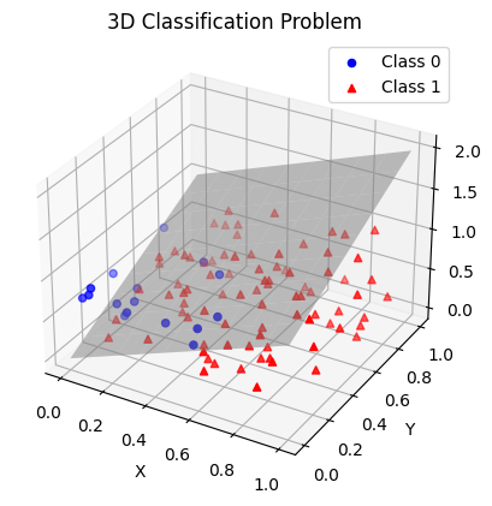

In [ ]:
# Prompt 使用隨機梯度下降分類器，使用產生7-detector，判斷圖形中的數字是否是7
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 切割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 將標籤轉換為二元標籤：是7的標籤為1，其他的標籤為0
y_binary = (y_train==7)


# 建立 SGD 分類器
sgd_classifier = SGDClassifier(loss='log_loss', alpha=0.001, max_iter=1000, random_state=42)

# 訓練 SGD 分類器
sgd_classifier.fit(X_train, y_binary)



SGDClassifier(alpha=0.001, loss='log_loss', random_state=42)

In [ ]:
# 此程式將2.2程式範例中的變數和模型儲存，以便在其他程式使用
from google.colab import drive
import pickle

# 连接到Google Drive
drive.mount('/content/drive')



variables= {'X': X, 'y': y, 'sgd_classifier': sgd_classifier, 'y_binary': y_binary}

# 保存多个变量到Google Drive
with open('/content/drive/My Drive/ML/variables2_2.pkl', 'wb') as f:   #  修改儲存路徑  .../ML    修改檔名 .../variables2_2.pkl
    pickle.dump(variables, f)

Mounted at /content/drive


第 50 張圖片中的數字是 7。
7


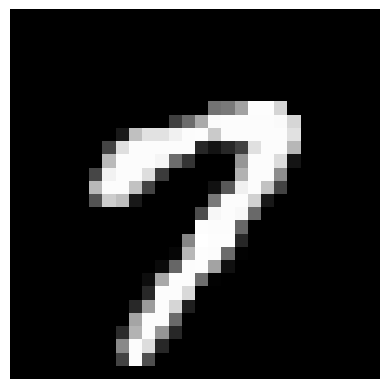

In [ ]:
# prompt 使用分類器，判別資料庫裡的第50張圖
# 提取第 50 張圖片
index=15
image_50 = X[index].reshape(1, -1)

# 使用分類器進行預測
prediction_50 = sgd_classifier.predict(image_50)

# 判斷預測結果
if prediction_50 == 1:
    print("第 50 張圖片中的數字是 7。")
else:
    print("第 50 張圖片中的數字不是 7。")

# 額外增加的程式碼，查看第50張圖片的標籤
print(y[index])
image = X[index].reshape(28, 28)
# 圖片視覺化
plt.imshow(image, cmap='gray')
plt.axis('off')  # 不顯示坐標軸
plt.show()